In [648]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

## create data frame and manipulation

In [649]:
data = pd.read_excel('Pipeline created from 2011 to 2018.xlsx')

In [650]:
data1 = pd.read_excel('Pipeline created from 2019 Jan to 2019 April.xlsx')

In [651]:
data.shape

(615980, 16)

In [652]:
data = pd.concat([data , data1] ,axis=0)

C:\Users\Durgeshwar.Singh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [653]:
data.shape

(650522, 16)

In [654]:
data1.shape

(34542, 15)

In [655]:
data = data[data['Opportunity Geography'].isin(['Americas','SA-Americas'])]
x = copy.deepcopy(data)

In [656]:
x = copy.deepcopy(data)

In [657]:
'''x['Closed Won Date'].fillna(x['Close Date'], inplace=True)
x['closed_won_data_month'] = pd.DatetimeIndex(x['Closed Won Date'])
x = x[x['closed_won_data_month'].dt.year.isin(['2017' , '2018' ,'2019'])]
x.to_csv('sales_data_18_19.csv')
'''

"x['Closed Won Date'].fillna(x['Close Date'], inplace=True)\nx['closed_won_data_month'] = pd.DatetimeIndex(x['Closed Won Date'])\nx = x[x['closed_won_data_month'].dt.year.isin(['2017' , '2018' ,'2019'])]\nx.to_csv('sales_data_18_19.csv')\n"

#### filtered with 'closed' forecaste category

In [658]:
data['Forecast Category'].value_counts()

Omitted      97376
Closed       64701
Pipeline      8042
Best Case     2260
Commit        1051
Name: Forecast Category, dtype: int64

In [659]:
x = x[x['Forecast Category'] == 'Closed']

In [660]:
x.head()

,Close Date,Close Date at Time of Lost,Closed Won Date,Created Date,First Year Bookings AMT (USD),Fiscal Period,Forecast Category,Opportunity 18 Digit ID,Opportunity Area,Opportunity Geography,Product Family,Stage,TRUE Created Date,Total Price (converted),Total Price (converted) Currency,Type
0,2017-04-27 00:00:00,NaN,2017-04-27,2017-03-20,33250.00,Q2-2017,Closed,0061300001MAqFCAA1,NA Northeast,Americas,Professional Services,Closed Pending,2017-03-20 13:44:00,33250.00,USD,Volume
3,2018-09-07 00:00:00,NaN,2018-09-07,2018-08-31,1484.00,Q3-2018,Closed,0061B00001XtFImQAN,NA West Enterprise,Americas,EMSS,Closed Pending,2018-08-31 14:53:00,1484.00,USD,Volume
4,2017-09-19 00:00:00,NaN,2017-09-19,2017-09-19,0.93,Q3-2017,Closed,0061B00001Ou4mIQAR,NA Northeast,Americas,Managed Planet,Closed Pending,2017-09-19 13:59:00,0.93,USD,Volume
5,2018-12-21 00:00:00,NaN,2018-12-21,2018-12-05,18800.00,Q4-2018,Closed,0061B00001a81pBQAQ,NA West,Americas,DesktopNow,Closed Won,2018-12-05 12:55:00,18800.00,USD,Volume
6,2017-05-02 00:00:00,NaN,2017-05-02,2017-05-02,105.60,Q2-2017,Closed,0061300001N2o4qAAB,NA Northeast,Americas,Management Suite,Closed Pending,2017-05-02 15:21:00,105.60,USD,Volume


In [661]:
print(x.shape)
print(x['Opportunity Geography'].value_counts())
print(x['Forecast Category'].value_counts())
print('Null values in closed date --' , x['Close Date'].isnull().sum())
print('Null values --' , x['Closed Won Date'].isnull().sum())

(64701, 16)
Americas       64494
SA-Americas      207
Name: Opportunity Geography, dtype: int64
Closed    64701
Name: Forecast Category, dtype: int64
Null values in closed date -- 0
Null values -- 2846


In [662]:
a = x.sort_values('Close Date')

In [663]:
#x['Closed Won Date'] = np.where(x['Closed Won Date'].isnull() , x['Close Date'] ,x['Closed Won Date'])
x['Closed Won Date'].fillna(x['Close Date'], inplace=True)
print(x.shape)
x.head()

(64701, 16)


,Close Date,Close Date at Time of Lost,Closed Won Date,Created Date,First Year Bookings AMT (USD),Fiscal Period,Forecast Category,Opportunity 18 Digit ID,Opportunity Area,Opportunity Geography,Product Family,Stage,TRUE Created Date,Total Price (converted),Total Price (converted) Currency,Type
0,2017-04-27 00:00:00,NaN,2017-04-27,2017-03-20,33250.00,Q2-2017,Closed,0061300001MAqFCAA1,NA Northeast,Americas,Professional Services,Closed Pending,2017-03-20 13:44:00,33250.00,USD,Volume
3,2018-09-07 00:00:00,NaN,2018-09-07,2018-08-31,1484.00,Q3-2018,Closed,0061B00001XtFImQAN,NA West Enterprise,Americas,EMSS,Closed Pending,2018-08-31 14:53:00,1484.00,USD,Volume
4,2017-09-19 00:00:00,NaN,2017-09-19,2017-09-19,0.93,Q3-2017,Closed,0061B00001Ou4mIQAR,NA Northeast,Americas,Managed Planet,Closed Pending,2017-09-19 13:59:00,0.93,USD,Volume
5,2018-12-21 00:00:00,NaN,2018-12-21,2018-12-05,18800.00,Q4-2018,Closed,0061B00001a81pBQAQ,NA West,Americas,DesktopNow,Closed Won,2018-12-05 12:55:00,18800.00,USD,Volume
6,2017-05-02 00:00:00,NaN,2017-05-02,2017-05-02,105.60,Q2-2017,Closed,0061300001N2o4qAAB,NA Northeast,Americas,Management Suite,Closed Pending,2017-05-02 15:21:00,105.60,USD,Volume


In [664]:
#x = x.sort_values('Close Date')[['Opportunity 18 Digit ID','First Year Bookings AMT (USD)' ,'Close Date' ,\
             #'TRUE Created Date'  , 'Closed Won Date']]

In [665]:
x.head(3)

,Close Date,Close Date at Time of Lost,Closed Won Date,Created Date,First Year Bookings AMT (USD),Fiscal Period,Forecast Category,Opportunity 18 Digit ID,Opportunity Area,Opportunity Geography,Product Family,Stage,TRUE Created Date,Total Price (converted),Total Price (converted) Currency,Type
0,2017-04-27 00:00:00,NaN,2017-04-27,2017-03-20,33250.00,Q2-2017,Closed,0061300001MAqFCAA1,NA Northeast,Americas,Professional Services,Closed Pending,2017-03-20 13:44:00,33250.00,USD,Volume
3,2018-09-07 00:00:00,NaN,2018-09-07,2018-08-31,1484.00,Q3-2018,Closed,0061B00001XtFImQAN,NA West Enterprise,Americas,EMSS,Closed Pending,2018-08-31 14:53:00,1484.00,USD,Volume
4,2017-09-19 00:00:00,NaN,2017-09-19,2017-09-19,0.93,Q3-2017,Closed,0061B00001Ou4mIQAR,NA Northeast,Americas,Managed Planet,Closed Pending,2017-09-19 13:59:00,0.93,USD,Volume


In [666]:
x['Closed Won Date'].isnull().sum()

0

In [667]:
x['close_won_date_month'] = pd.PeriodIndex(x['Closed Won Date'] ,freq = 'M')

In [668]:
x.tail()

,Close Date,Close Date at Time of Lost,Closed Won Date,Created Date,First Year Bookings AMT (USD),Fiscal Period,Forecast Category,Opportunity 18 Digit ID,Opportunity Area,Opportunity Geography,Product Family,Stage,TRUE Created Date,Total Price (converted),Total Price (converted) Currency,Type,close_won_date_month
34404,2019-03-29 00:00:00,NaT,2019-03-29,2019-03-26,0.01,Q1-2019,Closed,0061B00001cqQ1sQAE,NA Southeast,Americas,Professional Services,Closed Won,2019-03-26 06:46:00,0.01,NaN,New,2019-03
34462,2019-03-15 00:00:00,NaT,2019-03-15,2019-03-12,1111.20,Q1-2019,Closed,0061B00001cptfwQAA,NA Southeast,Americas,EMSS,Closed Won,2019-03-12 08:24:00,1111.20,NaN,Volume,2019-03
34463,2019-03-15 00:00:00,NaT,2019-03-15,2019-03-12,244.50,Q1-2019,Closed,0061B00001cptfwQAA,NA Southeast,Americas,EMSS,Closed Won,2019-03-12 08:24:00,244.50,NaN,Volume,2019-03
34522,2019-04-10 00:00:00,NaT,2019-04-10,2019-01-18,1755.00,Q2-2019,Closed,0061B00001cKhl4QAC,SysInt-Americas,SA-Americas,Shavlik Patch,Closed Won,2019-01-18 09:36:00,1755.00,NaN,New,2019-04
34523,2019-04-10 00:00:00,NaT,2019-04-10,2019-01-18,390.00,Q2-2019,Closed,0061B00001cKhl4QAC,SysInt-Americas,SA-Americas,Shavlik Patch,Closed Won,2019-01-18 09:36:00,390.00,NaN,New,2019-04


In [669]:
a = x[x.close_won_date_month.dt.year == 2018].groupby('close_won_date_month') \
['First Year Bookings AMT (USD)'].sum()
a

close_won_date_month
2018-01     3361153.81
2018-02     3569414.39
2018-03     8331085.37
2018-04     2785901.20
2018-05     7911919.62
2018-06    12767244.43
2018-07     3883553.63
2018-08     5834807.08
2018-09    12428619.10
2018-10     3263394.35
2018-11     5211160.28
2018-12    20286964.88
Freq: M, Name: First Year Bookings AMT (USD), dtype: float64

In [670]:
print('a' , sum(a['2018-7' : '2018-9'].values))
#print('b' , sum(b['2018-7' : '2018-9'].values))

a 22146979.81000001


In [671]:
df = x.set_index('close_won_date_month').groupby('close_won_date_month')['First Year Bookings AMT (USD)'].sum()
value = df.values
index = list(df.index)
grouped_dataframe = pd.DataFrame(data = value ,index =index)

In [672]:
grouped_dataframe['2018-7':'2018-9']
#grouped_dataframe

,0
2018-07,3883553.63
2018-08,5834807.08
2018-09,12428619.10


In [673]:
sum(grouped_dataframe['2018-10':'2018-12'].values)

array([28761519.50999999])

In [674]:
grouped_dataframe.columns = ['Booking Amount']

In [675]:
grouped_dataframe.head()

,Booking Amount
2011-01,332467.17
2011-02,756637.55
2011-03,2339407.31
2011-04,697237.41
2011-05,2332145.49


In [676]:
#grouped_dataframe = grouped_dataframe.loc['2016-1':]

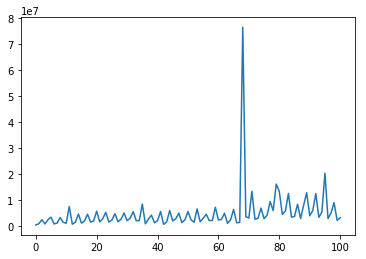

In [677]:
plt.plot(grouped_dataframe['Booking Amount'].values)

In [678]:
# grouped_dataframe.set_index(grouped_dataframe.index ,inplace=True)


#grouped_dataframe.values[i[0]] = grouped_dataframe.values.mean()
#grouped_dataframe

#grouped_dataframe['b'] = grouped_dataframe['Booking Amount'].map(lambda x: x if x >10**7 else None)

#grouped_dataframe

#grouped_dataframe['Booking Amount'].plot()

#grouped_dataframe['Booking Amount'].hist()

# plt.boxplot(grouped_dataframe['Booking Amount'])
# experiment_df = copy.deepcopy(grouped_dataframe)
# experiment_df['Booking Amount'] = experiment_df['Booking Amount'].map(lambda x : None if x > (1*10)**7 \
#                                                                       else x)

# print(experiment_df['Booking Amount'].isnull().sum())
# experiment_df.fillna(experiment_df['Booking Amount'].mean(),inplace=True)
# grouped_dataframe = experiment_df
# #grouped_dataframe['Booking Amount'].plot()
# grouped_dataframe.isnull().sum()
# grouped_dataframe.head(2)

#np.sqrt(grouped_dataframe['Booking Amount']).hist(normed = True)
#plt.show()
#np.sqrt(grouped_dataframe['Booking Amount']).skew()
#grouped_dataframe['Booking Amount'].plot()

#grouped_dataframe['Booking Amount']

In [679]:
#grouped_dataframe['sqrt']= np.sqrt(grouped_dataframe['Booking Amount'])
#grouped_dataframe['square'] = np.square(grouped_dataframe['sqrt'])
grouped_dataframe = grouped_dataframe['2017-1':'2019-3'][['Booking Amount']]
grouped_dataframe

,Booking Amount
2017-01,2527827.75
2017-02,2866864.31
2017-03,6835771.27
2017-04,2701422.16
2017-05,4076961.37
2017-06,9349451.07
2017-07,5869121.94
2017-08,16082636.71
2017-09,13289444.74
2017-10,4372148.31


In [680]:
## replace maximum or abnormal point to avg of rest

In [681]:
max_value = max(grouped_dataframe.values)
i , j   = np.where(max_value == grouped_dataframe.values)
grouped_dataframe.index[i]

PeriodIndex(['2018-12'], dtype='period[M]', freq='M')

In [682]:
mean = (grouped_dataframe.values.sum() - 20286964.88)/ (len(grouped_dataframe.values)-1)

In [683]:
grouped_dataframe['2018-12'] = 10767244.43
grouped_dataframe

,Booking Amount
2017-01,2527827.75
2017-02,2866864.31
2017-03,6835771.27
2017-04,2701422.16
2017-05,4076961.37
2017-06,9349451.07
2017-07,5869121.94
2017-08,16082636.71
2017-09,13289444.74
2017-10,4372148.31


In [684]:
data2 = pd.read_excel('april_to_june.xlsx' ,sheet_name='report1563209100640')
data2 = data2[data2['Opportunity Geography'].isin(['Americas','SA-Americas'])]
data2['Closed Won Date'].fillna(data2['Close Date'], inplace=True)
print(data2.shape)
data2 = data2.sort_values('Close Date')[['Opportunity 18 Digit ID','First Year Bookings AMT (USD)' ,'Close Date' ,\
             'TRUE Created Date'  , 'Closed Won Date']]
data2['closed_won_date_month'] = pd.PeriodIndex(data2['Closed Won Date'],freq ='M')
data2 = data2.set_index('closed_won_date_month').groupby('closed_won_date_month')['First Year Bookings AMT (USD)'].sum()
value = data2.values
index = list(data2.index)
data2 = pd.DataFrame(value ,index=index ,columns=['Booking Amount'])
data2

(2680, 16)


,Booking Amount
2019-04,2135082.18
2019-05,4785810.63
2019-06,11463149.38


In [685]:
grouped_dataframe = pd.concat([grouped_dataframe , data2] ,axis = 0)
grouped_dataframe.tail()

,Booking Amount
2019-02,4959140.19
2019-03,8936129.41
2019-04,2135082.18
2019-05,4785810.63
2019-06,11463149.38


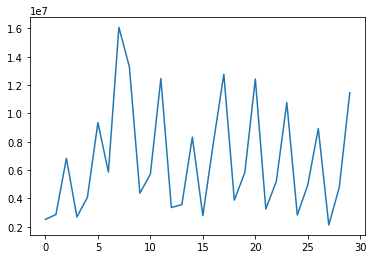

In [686]:
#grouped_dataframe.loc['2019-1'] = 2895303
#grouped_dataframe.loc['2019-2'] = 4763826
#grouped_dataframe.loc['2019-3'] = 9309998
plt.plot(grouped_dataframe['Booking Amount'].values)

In [687]:
grouped_dataframe.tail(10)

,Booking Amount
2018-09,12428619.10
2018-10,3263394.35
2018-11,5211160.28
2018-12,10767244.43
2019-01,2832417.42
2019-02,4959140.19
2019-03,8936129.41
2019-04,2135082.18
2019-05,4785810.63
2019-06,11463149.38


In [688]:
grouped_dataframe.shape

(30, 1)

## LSTM

In [689]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense,Activation ,RepeatVector ,TimeDistributed
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from numpy.random import seed
from keras.models import load_model
from sklearn.metrics import mean_squared_error

#### Data preparation

In [690]:
#datax = pd.read_csv('lstm_data.csv')
#datax

In [691]:
seed(1)
lstm_data = pd.DataFrame(columns=['date' , 'monthly_booking_amount' , 'x1','x2','x3','y'])

In [692]:
grouped_dataframe.reset_index(inplace=True)
grouped_dataframe.shape

(30, 2)

In [693]:
lstm_data['date'] = grouped_dataframe['index']
lstm_data['monthly_booking_amount'] = grouped_dataframe['Booking Amount']
lstm_data['x1'] = grouped_dataframe['Booking Amount']
lstm_data['x2'] = grouped_dataframe['Booking Amount'].shift(-1)
lstm_data['x3'] = grouped_dataframe['Booking Amount'].shift(-2)
lstm_data['y'] = grouped_dataframe['Booking Amount'].shift(-3)


In [694]:
lstm_data.head()

,date,monthly_booking_amount,x1,x2,x3,y
0,2017-01,2527827.75,2527827.75,2866864.31,6835771.27,2701422.16
1,2017-02,2866864.31,2866864.31,6835771.27,2701422.16,4076961.37
2,2017-03,6835771.27,6835771.27,2701422.16,4076961.37,9349451.07
3,2017-04,2701422.16,2701422.16,4076961.37,9349451.07,5869121.94
4,2017-05,4076961.37,4076961.37,9349451.07,5869121.94,16082636.71


In [695]:
#data_x =  datax.loc[: , 'x1':].dropna()
lstm_data.tail()

,date,monthly_booking_amount,x1,x2,x3,y
25,2019-02,4959140.19,4959140.19,8936129.41,2135082.18,4785810.63
26,2019-03,8936129.41,8936129.41,2135082.18,4785810.63,11463149.38
27,2019-04,2135082.18,2135082.18,4785810.63,11463149.38,NaN
28,2019-05,4785810.63,4785810.63,11463149.38,NaN,NaN
29,2019-06,11463149.38,11463149.38,NaN,NaN,NaN


In [696]:
new_data = lstm_data.loc[: , 'x1':].dropna()

In [697]:
new_data.tail()
# data_x = data_x.loc[:114]
# data_x.head()

,x1,x2,x3,y
22,5211160.28,10767244.43,2832417.42,4959140.19
23,10767244.43,2832417.42,4959140.19,8936129.41
24,2832417.42,4959140.19,8936129.41,2135082.18
25,4959140.19,8936129.41,2135082.18,4785810.63
26,8936129.41,2135082.18,4785810.63,11463149.38


In [698]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = pd.DataFrame(scaler.fit_transform(new_data) ,columns=['x1','x2','x3' , 'y'])

In [699]:
x_train ,y_train = np.array(scaled_df.iloc[:-6 , :-1]) ,np.array(scaled_df.iloc[:-6 , -1])
x_test ,y_test = np.array(scaled_df.iloc[-6: ,:-1]) , np.array(scaled_df.iloc[-6: , -1])

In [700]:
x_train_reshaped = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
y_train_reshaped =  y_train.reshape((y_train.shape[0],1,1))
x_val_resaped =    x_test.reshape((x_test.shape[0],1,x_test.shape[1]))

In [701]:
x_train_reshaped.shape

(21, 1, 3)

In [707]:
def modeling():
    model = Sequential()
    model.add(LSTM(380, return_sequences=True ))
    model.add(Activation('tanh'))
    model.add(LSTM(120, return_sequences=True))
    model.add(Activation('tanh'))
    model.add(LSTM(480, return_sequences=True))
    model.add(Activation('tanh'))
    model.add(LSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    #model.add(LSTM(20 , return_sequences=True))
    model.add(LSTM(520 , return_sequences=False))
    model.add(Activation('tanh'))
    model.add(BatchNormalization())
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    return model

In [709]:
def training(x_train_reshaped ,y_train ,x_val_resaped ,y_test):
    history = model.fit(x_train_reshaped, np.array(y_train), batch_size=11, epochs=150,
                        validation_data=(x_val_resaped,y_test))
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    return model

In [712]:
#compile_model = modeling()
#model = training(x_train_reshaped ,y_train ,x_val_resaped ,y_test)

In [ ]:
def predicion_validation(x_val_resaped ,model):
    y_pre = model.predict(x_val_resaped)

    ##index has to decide according to modeling 

    index = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6']

    forecast_pre = pd.DataFrame(columns=['x1','x2','x3','prediction'] ,  index =index)

    forecast_pre.loc[: , ['x1','x2','x3']] = x_test

    forecast_pre['prediction'] = y_pre

    forecast_pre = pd.DataFrame(scaler.inverse_transform(forecast_pre.values) , columns=['x1','x2','x3','prediction'] ,  index = index)

    forecast_pre['actual'] = new_data.iloc[-6:, -1:].values

    error = mean_squared_error(forecast_pre['prediction'], forecast_pre['actual'])
    print('Test MSE: %.3f' % error**0.5)

    #model.save('model_america_ 1217953.595.h5')


    forecast_pre.actual.plot()
    forecast_pre.prediction.plot()
    plt.legend()

    forecast_pre['error'] = abs(forecast_pre.actual - forecast_pre.prediction)

    forecast_pre['error_perc'] = forecast_pre['error'] / forecast_pre['actual'] * 100

    #grouped_dataframe
    print(forecast_pre)

    print(np.sum(forecast_pre['prediction'].iloc[-3:]))


    print(np.sum(forecast_pre['actual'].iloc[-3:]))

In [1]:
### I HAVE USED STATEFULL AND SCOPE OF IMPROVEMENT --STATELESS AND STAIONARITY

In [ ]:
##save model

In [ ]:
#model.save('model_america_989345.524.h5')

#### load model and predict

In [ ]:

model = load_model('model_america_989345.524.h5')

Test MSE: 989345.524
                 x1           x2           x3    prediction       actual  \
2019-1   3263394.35   5211160.28  10767244.43  3.182571e+06   2832417.42   
2019-2   5211160.28  10767244.43   2832417.42  4.926654e+06   4959140.19   
2019-3  10767244.43   2832417.42   4959140.19  9.860912e+06   8936129.41   
2019-4   2832417.42   4959140.19   8936129.41  3.496641e+06   2135082.18   
2019-5   4959140.19   8936129.41   2135082.18  4.769398e+06   4785810.63   
2019-6   8936129.41   2135082.18   4785810.63  9.719638e+06  11463149.38   

               error  error_perc  
2019-1  3.501537e+05   12.362362  
2019-2  3.248659e+04    0.655085  
2019-3  9.247826e+05   10.348805  
2019-4  1.361559e+06   63.770779  
2019-5  1.641229e+04    0.342936  
2019-6  1.743511e+06   15.209703  
17985677.481948975
18384042.18999999


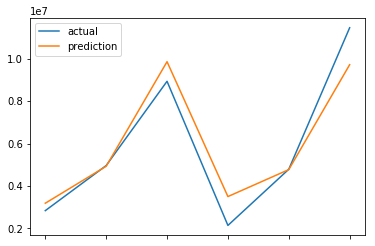

In [703]:
predicion_validation(x_val_resaped ,model ,x_test)

In [704]:
def prediction(model , test ,scaler,n):
    output_result = pd.DataFrame(columns= [1 ,2 ,3 ,4] , index=range(n//3))
    loc = 0
    for i in range(1,n+1):
        test_reshape=np.reshape(test,(1, test.shape[0],test.shape[1]))
        predict = model.predict(test_reshape)
        x = [3 if i%3==0 else i%3]
        output_result.loc[loc][x]= predict[0][0]
        #print(loc , "loc")
        if i % 3 == 0 and i >= 3:
            loc  = loc+1 
            #print(loc,i)
        test = np.append(test , predict ,axis=1)[: ,1:]
        #print(predict , test.shape)
    output_result[4] = output_result[3]
    #print(output_result)
    output = scaler.inverse_transform(output_result.values)[: , :-1]
    list1 = []
    
    list1.append(sum(output[0]))
    list1.append(sum(output[1]))
    result = pd.DataFrame(list1  , index=['19q3' , '19q4'] ,columns=['y'])
    return result ,output

In [705]:
#x_train_reshaped[-1]

In [706]:
result ,output = prediction(model , x_val_resaped[-1] ,scaler ,6)
#print(sum(result))
print(result)
#output
output

                 y
19q3  1.870254e+07
19q4  1.996675e+07


array([[ 9898812.4318195 ,  3160886.06547275,  5642836.59089544],
       [10694888.87011223,  3593324.62565276,  5678531.79496593]])

In [ ]:
#grouped_dataframe[['Booking Amount']]['2011-01': '2016-11'].describe()

In [ ]:
#grouped_dataframe[['Booking Amount']]['2017-01': '2018-12'].describe()

In [ ]:
#grouped_dataframe[['Booking Amount']]

In [566]:
x_val_resaped.shape

(6, 3, 1)